# CAP5625 Programming Assignment 2
### Adriel Marie Abad

### Deliverable 6: Machine Learning Libraries
The following implements Ridge regression using the Python library sci-kit learn. As much as possible, all the code that was written from scratch will be using sklearn instead.

### Discussion
The results from using the machine learning library aligns with the results produced from scratch. The graphs are almost identical, and both found the same optimal hyperparameter (although this may vary each time the code is run).

In [1]:
# Import libraries
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
df = pd.read_csv("Credit_N400_p9.csv")
print(df)

# Replace categorical with numerical
df["Gender"].replace(["Male","Female"],[0,1],inplace=True)
df["Student"].replace(["No","Yes"],[0,1],inplace=True)
df["Married"].replace(["No","Yes"],[0,1],inplace=True)

      Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0     14.891   3606     283      2   34         11    Male      No     Yes   
1    106.025   6645     483      3   82         15  Female     Yes     Yes   
2    104.593   7075     514      4   71         11    Male      No      No   
3    148.924   9504     681      3   36         11  Female      No      No   
4     55.882   4897     357      2   68         16    Male      No     Yes   
..       ...    ...     ...    ...  ...        ...     ...     ...     ...   
395   12.096   4100     307      3   32         13    Male      No     Yes   
396   13.364   3838     296      5   65         17    Male      No      No   
397   57.872   4171     321      5   67         12  Female      No     Yes   
398   37.728   2525     192      1   44         13    Male      No     Yes   
399   18.701   5524     415      5   64          7  Female      No      No   

     Balance  
0        333  
1        903  
2        580  
3  

In [3]:
# Split dataset into X and y
X = df.drop(['Balance'], axis=1)
y = df['Balance']

# Scale inputs
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
y_centered = y - np.mean(y)

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_centered, test_size=0.3)

In [4]:
# Function to create and train model
def ridge_model(a):
    #Initialize model
    ridge_model = Ridge(alpha=a)
    
    # Fit the model
    ridge_model.fit(X_train, y_train)
    
    # Predict
    ridge_y_pred = ridge_model.predict(X_test)
    
    # Output
    print(f"Tuning hyperparameter={a}")
    print(f"Coefficients: {ridge_model.coef_}")
    print()
    
    return ridge_model

In [5]:
a_list = [0.01, 0.1, 1, 10, 100, 1000, 10000] # List of hyperparameters to test
rm = [] # List of regression models
for i in range(len(a_list)):
    # Train models and add to list
    current_model = ridge_model(a_list[i])
    rm.append(current_model)

Tuning hyperparameter=0.01
Coefficients: [-271.45543157  413.36499091  190.62475485   21.7548138    -8.37018284
    4.40564929   -9.58517603  125.13252921   -6.18370083]

Tuning hyperparameter=0.1
Coefficients: [-271.0627212   399.29759361  204.35192452   21.16104415   -8.41704988
    4.47367424   -9.58844259  125.01389061   -6.34501739]

Tuning hyperparameter=1
Coefficients: [-266.72928967  343.59653727  256.02704751   18.90131347   -8.83628741
    4.85789102   -9.49072169  124.32242927   -7.00842757]

Tuning hyperparameter=10
Coefficients: [-226.41733436  287.74795601  272.6521005    17.73838129  -12.07861977
    6.70339321   -7.96156748  120.46846217   -7.95288345]

Tuning hyperparameter=100
Coefficients: [-61.67551327 189.83786189 187.70190931  15.87235143 -18.10497593
  12.56131752  -1.67541086  94.12600237  -8.72659641]

Tuning hyperparameter=1000
Coefficients: [22.07045776 67.91045482 67.67670527  4.79075509 -2.82368353  7.91076679
  0.48560661 30.11221367 -2.74647822]

Tuning h

In [6]:
coef = [] # List of model coefficients for each hyperparameter

for i in range(len(a_list)):
    # Extract the model coefficients from the scikit model and turn them into a list
    model_coefs = pd.DataFrame(zip(X.columns, rm[i].coef_)).to_numpy().tolist()
    # Add to list
    coef.append(model_coefs)

In [7]:
def y_points(index):
    return [coef[0][index][1], coef[1][index][1], coef[2][index][1], coef[3][index][1], coef[4][index][1], coef[5][index][1], coef[6][index][1]]

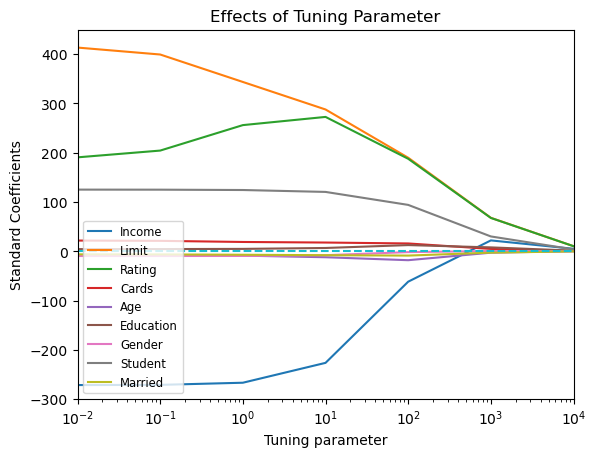

In [8]:
# Plot graphs to illustrate effect of tuning parameters
x_points = [0.01, 0.1, 1, 10, 100, 1000, 10000] # Get x points

y_income = y_points(0)
y_limit = y_points(1)
y_rating = y_points(2)
y_cards = y_points(3)
y_age = y_points(4)
y_education = y_points(5)
y_gender = y_points(6)
y_student = y_points(7)
y_married = y_points(8)

y_zero = np.zeros(7)

plt.plot(x_points, y_income, label="Income")
plt.plot(x_points, y_limit, label="Limit")
plt.plot(x_points, y_rating, label="Rating")
plt.plot(x_points, y_cards, label="Cards")
plt.plot(x_points, y_age, label="Age")
plt.plot(x_points, y_education, label="Education")
plt.plot(x_points, y_gender, label="Gender")
plt.plot(x_points, y_student, label="Student")
plt.plot(x_points, y_married, label="Married")

plt.plot(x_points, y_zero, linestyle="dashed")

plt.title("Effects of Tuning Parameter")
plt.xlabel("Tuning parameter")
plt.ylabel("Standard Coefficients")
plt.ylim(-300,450)
plt.xlim(0.01,10000)
plt.xscale('log')
plt.legend(loc="lower left", fontsize="small")


In [9]:
mse = [] # List of average MSE of models of different hyperparameters
for i in range(len(rm)):
    # Create pipelines to center and standardize X and y
    rm_pipeline = Pipeline([("scaler", StandardScaler()), ("estimator", rm[i])])
    kfold_model = KFold(n_splits=5)
    # Get negative mean squared error and negate again
    neg_mse = cross_val_score(rm_pipeline, X, y, cv=5, scoring="neg_mean_squared_error")
    neg_mse *= -1
    # Output MSE of each fold
    print(f"MSE of Model Tuning Parameter a={a_list[i]}")
    print(neg_mse)
    # Output average MSE
    avg_mse = sum(neg_mse) / len(neg_mse)
    print(f"Average MSE: {avg_mse}")
    print()
    # Add to list of average MSE
    mse.append(avg_mse)

MSE of Model Tuning Parameter a=0.01
[ 8202.48400753 13003.63110583  7405.59474948 11655.85366864
 10187.16133469]
Average MSE: 10090.944973234078

MSE of Model Tuning Parameter a=0.1
[ 8186.11784797 13024.83785927  7410.90062308 11618.14290323
 10172.33947419]
Average MSE: 10082.46774154709

MSE of Model Tuning Parameter a=1
[ 8187.32991075 13123.02647365  7523.52022106 11524.26231364
 10058.47922032]
Average MSE: 10083.323627883561

MSE of Model Tuning Parameter a=10
[ 9365.80081539 14052.79204258  8983.52474093 12457.13633267
  9414.03037942]
Average MSE: 10854.656862200465

MSE of Model Tuning Parameter a=100
[29257.0399079  38114.76823986 30977.20422444 33888.76435508
 19146.54443566]
Average MSE: 30276.864232586417

MSE of Model Tuning Parameter a=1000
[ 99794.10362459 133038.02070749 115657.09121281 103885.94364584
  83234.20834553]
Average MSE: 107121.87350725204

MSE of Model Tuning Parameter a=10000
[175149.36527861 228334.53624629 201480.43579309 178223.54080247
 174784.9998

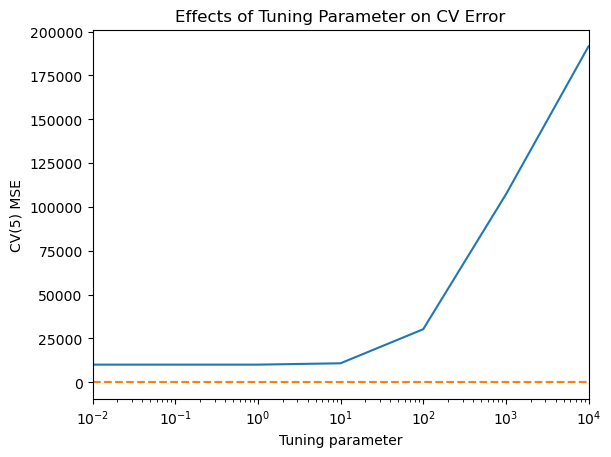

In [10]:
# Plot graphs to illustrate effect of tuning parameters
x_points = [0.01, 0.1, 1, 10, 100, 1000, 10000] # Get x points
y_points = [mse[0],mse[1], mse[2], mse[3], mse[4], mse[5], mse[6]]

y_zero = np.zeros(7)

plt.plot(x_points, y_points, label="CV(5) Error")

plt.plot(x_points, y_zero, linestyle="dashed")

plt.title("Effects of Tuning Parameter on CV Error")
plt.xlabel("Tuning parameter")
plt.ylabel("CV(5) MSE")
plt.xlim(0.01,10000)
plt.xscale('log')

In [12]:
print("Optimal tuning parameter: 10^-1")
print()
opt_model = ridge_model(0.1)

Optimal tuning parameter: 10^-1

Tuning hyperparameter=0.1
Coefficients: [-271.0627212   399.29759361  204.35192452   21.16104415   -8.41704988
    4.47367424   -9.58844259  125.01389061   -6.34501739]

